# Customer Satisfaction Dataset

In [26]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Step-1:** Import the dataset

In [27]:
df = pd.read_csv("/kaggle/input/cs1234/Santander Customer Satisfaction_train.csv")
print(df.shape)
target_column = 0
# Check if all features are numeric
features_df = df.drop(columns=target_column) if target_column else df
all_numeric = all(pd.api.types.is_numeric_dtype(features_df[col]) for col in features_df.columns)
print("All features numeric:", all_numeric)
     
df.head()

(76020, 371)
All features numeric: True


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


**Step-2:** Handling the Null values in the dataset

In [29]:
df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [30]:
#Drop the null values if you have more than 30% of Null
df.dropna(axis=1, thresh=0.7*len(df), inplace=True)

#Fill the null values
df = df.fillna(df.median())

In [31]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


**Step-3:** Splitting the Dataset

In [36]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Step-4:** Applying Constant Feature

In [33]:
constant_feature = [col for col in X_train.columns if X_train[col].nunique == 1]
print(constant_feature)

[]


Step-5: Quasi Constant Feature

In [37]:
quasi_constant_feature = []
threshold = 0.98

for col in X_train.columns:
    freq = X_train[col].value_counts(normalize=True).iloc[0]
    if freq >= threshold:
        quasi_constant_feature.append(col)

print("quasi_constant_feature: ", quasi_constant_feature)
print("\nTotal: ", len(quasi_constant_feature))

X_train = X_train.drop(columns=quasi_constant_feature, axis=1)
X_test = X_test.drop(columns=quasi_constant_feature, axis=1)

quasi_constant_feature:  ['imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var6_0', 'ind_var6', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var40_0', 'ind_var40', 'ind_var41', 'ind_var39', 'ind_var44_0', 'ind_var44', 'ind_var46_0', 'ind_var46', 'num_var1_0', 'num_var1', 'num_var6_0', 'num_var6', 'num_var13_largo_0', 'num_var13_largo', 'num_var13_medio_0', 'num_var13_medio', 'num_var14', 'num_var17_0', 'num_var17', 'num_var18_0', 'num_var18', 'num_var20_0', '

**Step-6:** Duplicate Features

In [38]:
train_T = X_train.T
duplicate_features = train_T[train_T.duplicated()].index.tolist()
print(duplicate_features)
print("\nTotal Duplicate Features: ", len(duplicate_features))
X_train = X_train.drop(columns=duplicate_features, axis=1)
X_test = X_test.drop(columns=duplicate_features, axis=1)

['ind_var26', 'ind_var25', 'ind_var37', 'num_var26', 'num_var25', 'num_var37']

Total Duplicate Features:  6


**Step-7:** Correlation

In [45]:
corr_matrix = X_train.corr()
corr_threshold = 0.98
corr_pairs = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j] > corr_threshold):
            corr_pairs.add(corr_matrix.columns[i])

print("Correlation Features: ",corr_pairs)
print("\nTotal: ", len(corr_pairs))

X_train = X_train.drop(columns=corr_pairs, axis=1)
X_test = X_test.drop(columns=corr_pairs, axis=1)


Correlation Features:  set()

Total:  0


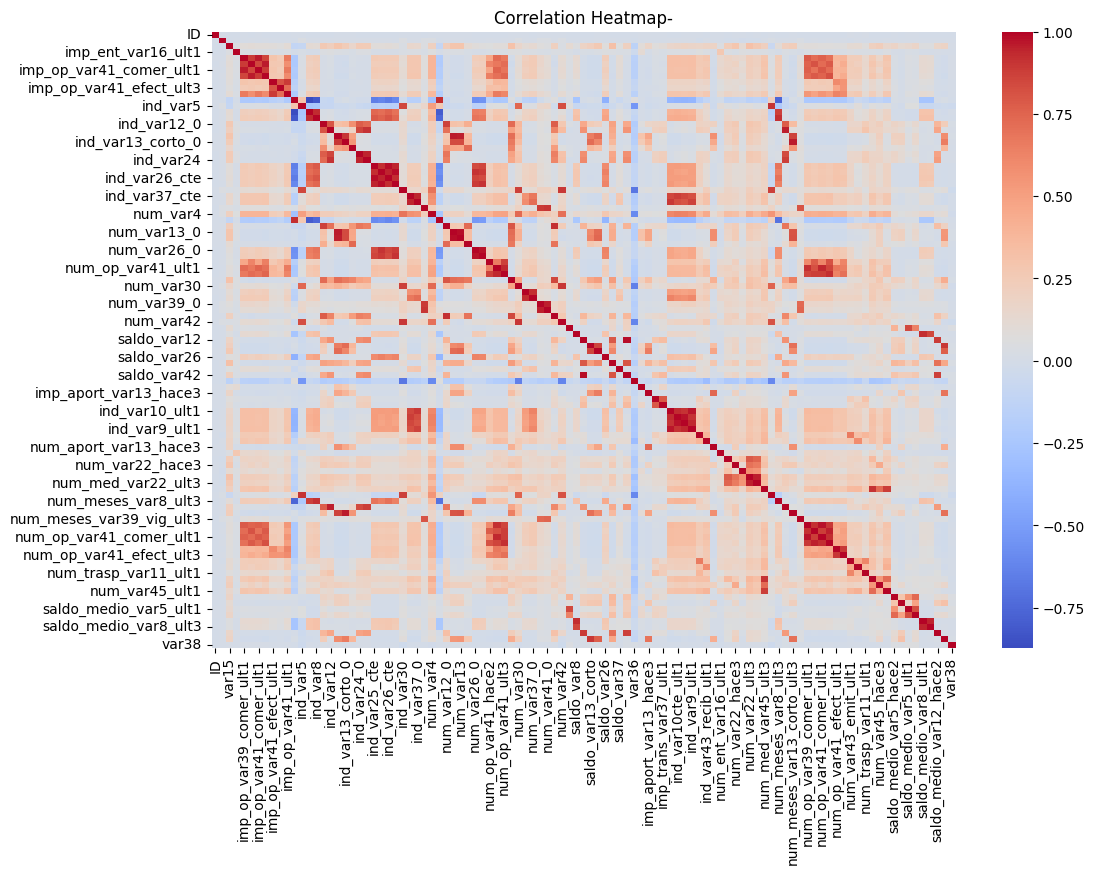

In [43]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap-")
plt.show()

**Step-8:** Mututal Information Regression

In [44]:
X_train = X_train.select_dtypes(include=['number'])

mi_scores = mutual_info_regression(X_train, y_train, discrete_features=False)
mi_df = pd.Series(mi_scores, index=X_train.columns)
mi_df = mi_df.sort_values(ascending=False)


low_importance = mi_df[mi_df < 0.01].index.tolist()

print("Mututal Information: ",low_importance)
print("\nTotal: ", len(low_importance))

X_train = X_train.drop(columns=low_importance,axis=1)
X_test = X_test.drop(columns=low_importance, axis =1)

Mututal Information:  ['num_var26_0', 'saldo_medio_var5_hace3', 'saldo_medio_var5_hace2', 'ind_var37_0', 'num_op_var41_ult1', 'var36', 'ind_var43_emit_ult1', 'ind_var39_0', 'num_var13_0', 'saldo_var5', 'ind_var9_ult1', 'ind_var24_0', 'num_var45_hace3', 'imp_var43_emit_ult1', 'saldo_var13', 'num_var13', 'num_var39_0', 'ind_var8_0', 'num_aport_var13_hace3', 'saldo_var12', 'ind_var13_0', 'ind_var13_corto_0', 'num_var22_ult1', 'imp_ent_var16_ult1', 'num_var42_0', 'num_meses_var12_ult3', 'num_var41_0', 'ind_var26_cte', 'num_var25_0', 'num_op_var41_hace2', 'ind_var12', 'var38', 'num_ent_var16_ult1', 'num_op_var41_comer_ult1', 'ID', 'ind_var25_0', 'ind_var10cte_ult1', 'ind_var37_cte', 'saldo_medio_var8_ult1', 'num_var22_ult3', 'imp_op_var41_ult1', 'num_med_var45_ult3', 'ind_var26_0', 'saldo_var8', 'num_var14_0', 'num_var5_0', 'num_var12_0', 'imp_op_var41_efect_ult3', 'ind_var12_0', 'ind_var14_0', 'ind_var24', 'imp_op_var41_comer_ult3', 'ind_var8', 'ind_var5_0', 'imp_op_var41_efect_ult1', 'ind

In [ ]:
#Chi Square cannot be applied since the output feature is numerical

In [46]:
from sklearn.feature_selection import f_regression
import pandas as pd

# 1. Select numerical features

# 2. Compute F-statistic and p-values
f_scores, p_values = f_regression(X_train, y_train)

# 3. Wrap into a DataFrame for better understanding
anova_df = pd.DataFrame({
    'F_Score': f_scores,
    'P_Value': p_values
}, index=X_train.columns)

# 4. Sort by F-score (descending)
anova_df = anova_df.sort_values(by='F_Score', ascending=False)

# 5. Optional: remove features with weak relationship (e.g., p-value > 0.05)
insignificant_features = anova_df[anova_df['P_Value'] > 0.05].index.tolist()

print("Dropping features with weak linear relationship:", insignificant_features)
print("Total: ", len(insignificant_features))

# 6. Drop those from train and test
X_train = X_train.drop(columns=insignificant_features)
X_test = X_test.drop(columns=insignificant_features)


Dropping features with weak linear relationship: []
Total:  0
